In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.gaussian_process import GaussianProcessRegressor

In [33]:
X1 = np.load(r'C:\Users\xdb13122\Desktop\ML Course\capstone project\initial_data\function_8\initial_inputs.npy')
Y1 = np.load(r'C:\Users\xdb13122\Desktop\ML Course\capstone project\initial_data\function_8\initial_outputs.npy')
X2 = np.load(r'C:\Users\xdb13122\Desktop\ML Course\capstone project\initial_data2\function_8\initial_inputs.npy')
Y2 = np.load(r'C:\Users\xdb13122\Desktop\ML Course\capstone project\initial_data2\function_8\initial_outputs.npy')
X = np.concatenate((X1, X2), axis=0)
Y = np.concatenate((Y1, Y2), axis=0)

In [34]:
X

array([[6.04994453e-01, 2.92215020e-01, 9.08452748e-01, 3.55506242e-01,
        2.01668719e-01, 5.75338005e-01, 3.10310951e-01, 7.34281377e-01],
       [1.78006959e-01, 5.66222654e-01, 9.94861845e-01, 2.10325006e-01,
        3.20152657e-01, 7.07908792e-01, 6.35384489e-01, 1.07131627e-01],
       [9.07697668e-03, 8.11626153e-01, 5.20520360e-01, 7.56866752e-02,
        2.65111825e-01, 9.16516894e-02, 5.92415145e-01, 3.67320262e-01],
       [5.06028164e-01, 6.53730123e-01, 3.63410779e-01, 1.77981049e-01,
        9.37283044e-02, 1.97425331e-01, 7.55826900e-01, 2.92472339e-01],
       [3.59909264e-01, 2.49075679e-01, 4.95997170e-01, 7.09214981e-01,
        1.14987195e-01, 2.89206921e-01, 5.57295151e-01, 5.93881726e-01],
       [7.78818344e-01, 3.41949948e-03, 3.37983130e-01, 5.19527778e-01,
        8.20906993e-01, 5.37246689e-01, 5.51347098e-01, 6.60032086e-01],
       [9.08649322e-01, 6.22496998e-02, 2.38259546e-01, 7.66603545e-01,
        1.32335962e-01, 9.90243814e-01, 6.88067822e-01, 7.

In [35]:
new_row = np.array([[0.725027, 0.436394, 0.87957 , 0.933559, 0.798216, 0.888921,
       0.173093, 0.945768], [0.034582, 0.109186, 0.430764, 0.929268, 0.445779, 0.345447,
       0.735088, 0.663642], [0.994523, 0.621785, 0.532   , 0.807742, 0.697183, 0.028489,
       0.082252, 0.023909],[0.994523, 0.621785, 0.532   , 0.807742, 0.697183, 0.028489,
       0.082252, 0.023909], [0.38694 , 0.891794, 0.22027 , 0.143945, 0.113756, 0.869592,
       0.640013, 0.767532], [0.835086, 0.906052, 0.322912, 0.801064, 0.896511, 0.373978,
       0.336207, 0.262152]])
X = np.concatenate((X, new_row), axis=0)

In [36]:
X

array([[6.04994453e-01, 2.92215020e-01, 9.08452748e-01, 3.55506242e-01,
        2.01668719e-01, 5.75338005e-01, 3.10310951e-01, 7.34281377e-01],
       [1.78006959e-01, 5.66222654e-01, 9.94861845e-01, 2.10325006e-01,
        3.20152657e-01, 7.07908792e-01, 6.35384489e-01, 1.07131627e-01],
       [9.07697668e-03, 8.11626153e-01, 5.20520360e-01, 7.56866752e-02,
        2.65111825e-01, 9.16516894e-02, 5.92415145e-01, 3.67320262e-01],
       [5.06028164e-01, 6.53730123e-01, 3.63410779e-01, 1.77981049e-01,
        9.37283044e-02, 1.97425331e-01, 7.55826900e-01, 2.92472339e-01],
       [3.59909264e-01, 2.49075679e-01, 4.95997170e-01, 7.09214981e-01,
        1.14987195e-01, 2.89206921e-01, 5.57295151e-01, 5.93881726e-01],
       [7.78818344e-01, 3.41949948e-03, 3.37983130e-01, 5.19527778e-01,
        8.20906993e-01, 5.37246689e-01, 5.51347098e-01, 6.60032086e-01],
       [9.08649322e-01, 6.22496998e-02, 2.38259546e-01, 7.66603545e-01,
        1.32335962e-01, 9.90243814e-01, 6.88067822e-01, 7.

In [37]:
Y

array([7.3987211 , 7.00522736, 8.45948162, 8.28400781, 8.60611679,
       8.54174792, 7.32743458, 7.29987205, 7.95787474, 5.59219339,
       7.85454099, 6.79198578, 8.97655402, 7.3790829 , 9.598482  ,
       8.15998319, 7.13162397, 6.76796253, 7.43374407, 9.01307515,
       7.31089382, 5.84106731, 9.14163949, 8.81755844, 6.45194313,
       8.83074505, 9.34427428, 6.88784639, 8.04221254, 7.69236805,
       7.92375877, 8.42175924, 8.2780624 , 7.11345716, 6.40258841,
       8.47293632, 7.97768459, 7.46087219, 7.43659353, 9.18300525,
       7.38153659, 6.21406582, 8.34373778, 8.20235493, 7.0175736 ,
       8.15436185, 8.59988062, 7.41496438, 6.35307753, 7.04891614,
       8.83964993, 9.75508539, 9.069804  , 8.33091139, 9.08235861,
       9.06259425, 7.88211016, 6.8055637 , 9.22168616, 8.57638926,
       6.45101025, 8.95855365, 8.30868114, 9.23898119, 7.41316123,
       8.28986748, 8.14792352, 6.56627417, 8.64815107, 8.10407818,
       8.67513919, 8.73943795, 7.55172428, 8.25528511, 6.61336

In [38]:
new_row = np.array([6.6724660542756, 8.4514733669101, 6.9711140222514, 6.9711140222514, 8.4984966149666, 7.7430955153231])
Y = np.concatenate((Y, new_row), axis=0)

In [39]:
Y

array([7.3987211 , 7.00522736, 8.45948162, 8.28400781, 8.60611679,
       8.54174792, 7.32743458, 7.29987205, 7.95787474, 5.59219339,
       7.85454099, 6.79198578, 8.97655402, 7.3790829 , 9.598482  ,
       8.15998319, 7.13162397, 6.76796253, 7.43374407, 9.01307515,
       7.31089382, 5.84106731, 9.14163949, 8.81755844, 6.45194313,
       8.83074505, 9.34427428, 6.88784639, 8.04221254, 7.69236805,
       7.92375877, 8.42175924, 8.2780624 , 7.11345716, 6.40258841,
       8.47293632, 7.97768459, 7.46087219, 7.43659353, 9.18300525,
       7.38153659, 6.21406582, 8.34373778, 8.20235493, 7.0175736 ,
       8.15436185, 8.59988062, 7.41496438, 6.35307753, 7.04891614,
       8.83964993, 9.75508539, 9.069804  , 8.33091139, 9.08235861,
       9.06259425, 7.88211016, 6.8055637 , 9.22168616, 8.57638926,
       6.45101025, 8.95855365, 8.30868114, 9.23898119, 7.41316123,
       8.28986748, 8.14792352, 6.56627417, 8.64815107, 8.10407818,
       8.67513919, 8.73943795, 7.55172428, 8.25528511, 6.61336

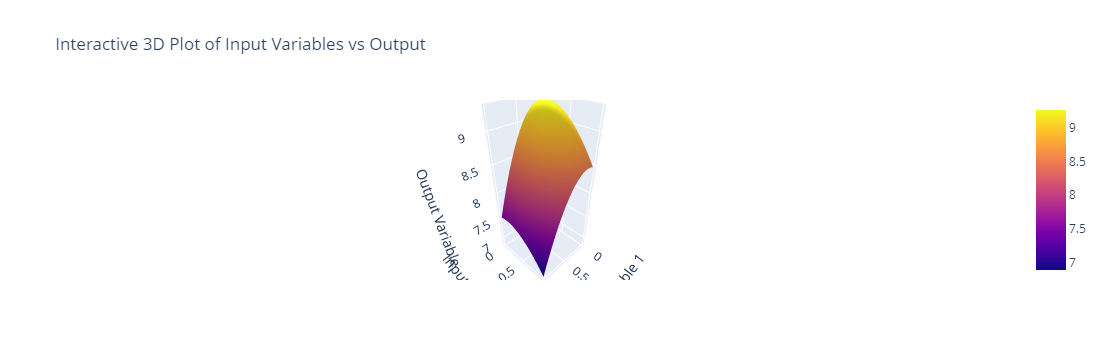

In [40]:
import numpy as np
import plotly.graph_objs as go
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern

# Sample input data (X) and corresponding output data (y)
X = X
y = Y

# Choose two input variables for the 3D plot (e.g., X[:, 0] and X[:, 1])
input1_idx = 0  # Index of the first input variable
input2_idx = 1  # Index of the second input variable

# Define the Matern kernel for the Gaussian Process
kernel = Matern(length_scale=1.0, nu=2.5)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit the Gaussian Process model
gp.fit(X, y)

# Create a grid of values to predict over for input1 and input2
x1_range = np.linspace(0, 1, 50)
x2_range = np.linspace(0, 1, 50)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Prepare the grid for prediction by fixing other input variables
X_grid = np.zeros((x1_grid.size, X.shape[1]))

# Fill in the values for input1 and input2
X_grid[:, input1_idx] = x1_grid.ravel()
X_grid[:, input2_idx] = x2_grid.ravel()

# Keep other input variables fixed at their means (or any other strategy)
for i in range(X.shape[1]):
    if i != input1_idx and i != input2_idx:
        X_grid[:, i] = np.mean(X[:, i])

# Predict the output for the grid using the Gaussian Process
y_pred, _ = gp.predict(X_grid, return_std=True)
y_pred = y_pred.reshape(x1_grid.shape)

# Create a 3D plot
fig = go.Figure(data=[go.Surface(z=y_pred, x=x1_grid, y=x2_grid)])

fig.update_layout(
    title='Interactive 3D Plot of Input Variables vs Output',
    scene=dict(
        xaxis_title='Input Variable 1',
        yaxis_title='Input Variable 2',
        zaxis_title='Output Variable'
    ),
    autosize=True
)

fig.show()

Optimized input values:
[[0.24065821 0.05063744 0.28287984 0.15455464 0.11458492 0.51815664
  0.96470045 0.57033653]
 [0.59336266 0.68254685 0.26360493 0.95906653 0.06643858 0.22565122
  0.42800469 0.2412093 ]
 [0.30681103 0.2252481  0.8627939  0.54794501 0.34206883 0.84971331
  0.83555323 0.84812   ]
 [0.43083944 0.27754732 0.89081547 0.15438305 0.73671384 0.04478031
  0.83724592 0.97330775]
 [0.31847216 0.88760597 0.72372929 0.23310306 0.75051566 0.44334954
  0.32021246 0.39445636]
 [0.89997155 0.62003059 0.90042595 0.43636349 0.08791877 0.50329175
  0.40796267 0.76504469]
 [0.89873124 0.60174247 0.90739449 0.4424263  0.08202942 0.47099612
  0.40359279 0.75777123]
 [1.         0.6547331  1.         0.4231025  0.         0.49006009
  0.31928716 0.8237253 ]
 [1.         0.66144902 1.         0.33043531 0.         0.48588153
  0.5230289  0.65018208]
 [1.         0.45268218 0.87047489 0.26334102 0.         0.58157412
  0.28956513 0.68191608]
 [1.         0.62222613 0.75314983 0.24757778 

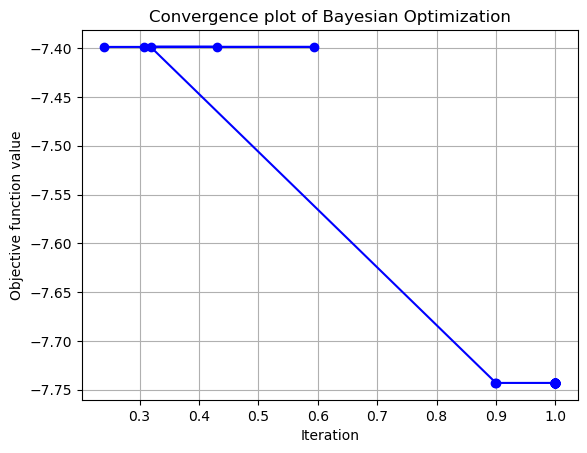

In [41]:
import numpy as np
import GPyOpt
import matplotlib.pyplot as plt

# Define the input and output arrays
X = X
y = Y

# Define the objective function to be maximized
def objective_function(x):
    x = np.array(x).flatten()  # Flatten the input to ensure it's a 1D array
    result = np.interp(x[0], X[:, 0], y)  # Interpolate based on the first feature column
    return -result  # Since we're maximizing, return negative value

# Define the optimization bounds
bounds = [{'name': f'var{i}', 'type': 'continuous', 'domain': (0, 1)} for i in range(X.shape[1])]

# Create the Bayesian Optimization object
opt = GPyOpt.methods.BayesianOptimization(f=objective_function, domain=bounds)

# Run the optimization
opt.run_optimization(max_iter=50)

# Extract the optimization results
optimized_inputs = opt.X  # The input values at each iteration
optimized_outputs = opt.Y  # The output (objective function value) at each iteration

# Find the maximum output value and the corresponding input
max_output = np.min(optimized_outputs)  # Maximizing, so we use min since the objective is negative
max_input = optimized_inputs[np.argmin(optimized_outputs)]  # Corresponding input for the maximum output

# Print the results
print("Optimized input values:")
print(optimized_inputs)
print("\nOptimized output values (objective function values):")
print(optimized_outputs)
print("\nMaximum output found:", -max_output)  # Return the positive value since we negated in the objective function
print("Corresponding input values for maximum output:", max_input)

# Plot the convergence of the optimization
plt.plot(opt.X[:, 0], opt.Y, 'b-o')
plt.title('Convergence plot of Bayesian Optimization')
plt.xlabel('Iteration')
plt.ylabel('Objective function value')
plt.grid(True)
plt.show()

Optimized input values:
[[0.7965429868602331, 0.18343478986616382, 0.7796910002727695, 0.5968501579464871, 0.44583275285359125, 0.09997491581800291, 0.45924889196586727, 0.3337086111390219], [0.1428668179219408, 0.650888472948853, 0.05641157902710027, 0.7219987722668249, 0.9385527090157504, 0.0007787658410143285, 0.9922115592912177, 0.6174815096277166], [0.611653160488281, 0.007066305219717408, 0.02306242504141576, 0.5247746602583893, 0.3998609717152556, 0.046665663213615434, 0.9737555188414594, 0.23277134043030429], [0.09060643453282081, 0.6183860093330874, 0.38246199126716285, 0.9832308858067884, 0.46676289324798004, 0.8599404067363208, 0.6803075385877798, 0.4504992519695431], [0.013264961159866532, 0.942201755684853, 0.5632882178455394, 0.3854165025399162, 0.015966252220214198, 0.23089382562214905, 0.24102546602601177, 0.6832635188254583], [0.609996657782621, 0.8331949117361646, 0.1733646535077721, 0.3910606075732409, 0.18223608778806236, 0.7553614103176527, 0.4251558744912448, 0.20

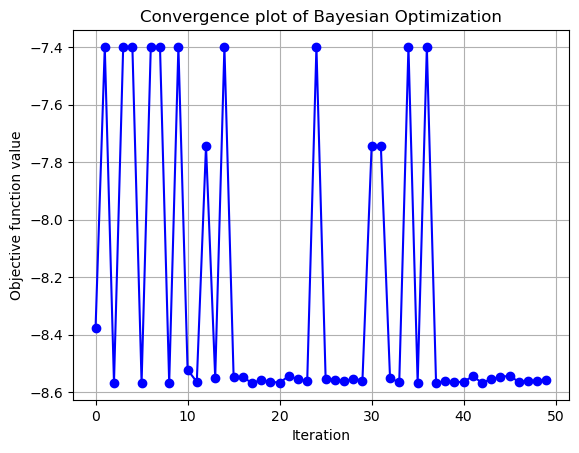

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from skopt import gp_minimize
from skopt.space import Real

# Define the input and output arrays
X = X
y = Y

# Define the objective function
def objective_function(x):
    x = np.array(x).flatten()
    result = np.interp(x[0], X[:, 0], y)
    return -result  # Since we're maximizing, return the negative value

# Define the search space
space = [Real(0, 1) for _ in range(X.shape[1])]

# Run the optimization using gp_minimize
result = gp_minimize(objective_function, space, n_calls=50, random_state=42)

# Extract the optimization results
optimized_inputs = result.x_iters
optimized_outputs = result.func_vals

# Find the maximum output value and the corresponding input
max_output = -np.min(optimized_outputs)  # Since the objective is negated
max_input = optimized_inputs[np.argmin(optimized_outputs)]

# Print the results
print("Optimized input values:")
print(optimized_inputs)
print("\nOptimized output values (objective function values):")
print(optimized_outputs)
print("\nMaximum output found:", max_output)
print("Corresponding input values for maximum output:", max_input)

# Plot the convergence of the optimization
plt.plot(np.arange(len(optimized_outputs)), optimized_outputs, 'b-o')
plt.title('Convergence plot of Bayesian Optimization')
plt.xlabel('Iteration')
plt.ylabel('Objective function value')
plt.grid(True)
plt.show()

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from scipy.optimize import minimize

# Sample input data (X) and corresponding output data (y)
X = X
y = Y

# Define the Matern kernel with nu=2.5 for smoother functions
kernel = Matern(length_scale=1.0, nu=2.5)

# Initialize the GaussianProcessRegressor with the Matern kernel
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit the Gaussian Process model to the data
gp.fit(X, y)

# Define the acquisition function (Upper Confidence Bound, UCB)
def acquisition_function(x, gp, kappa=1.96):
    # Predict the mean and standard deviation at the point x
    mu, sigma = gp.predict([x], return_std=True)
    # Return the Upper Confidence Bound
    return mu - kappa * sigma

# Define the function for Bayesian Optimization
def bayesian_optimization(gp, X, y, n_iterations=10, acquisition_function=acquisition_function):
    # History of the best result found
    best_x = X[np.argmax(y)]  # Start with the best known input
    best_y = np.max(y)
    
    for i in range(n_iterations):
        # Optimize the acquisition function to find the next sampling point
        res = minimize(lambda x: -acquisition_function(x, gp), best_x, bounds=[(0, 1)]*X.shape[1])
        next_x = res.x
        # Evaluate the objective function at the new point
        next_y = np.interp(next_x[0], X[:, 0], y)  # Interpolate output for the given inputs
        
        # Add the new point to the dataset
        X = np.vstack([X, next_x])
        y = np.append(y, next_y)
        
        # Refit the GP with the new data
        gp.fit(X, y)
        
        # Update the best result
        if next_y > best_y:
            best_y = next_y
            best_x = next_x
        
        print(f"Iteration {i+1}: Best Value = {best_y} at {best_x}")
    
    return best_x, best_y

# Run Bayesian Optimization
best_x, best_y = bayesian_optimization(gp, X, y, n_iterations=20)

# Print the final best input and output values
print("\nBest Input Variables for Maximized Output:", best_x)
print("Best Output Value:", best_y)

Iteration 1: Best Value = 9.755085388342168 at [0.04343225 0.10004702 0.22342261 0.01686426 0.28000728 0.36384718
 0.32840638 0.83239639]
Iteration 2: Best Value = 9.755085388342168 at [0.04343225 0.10004702 0.22342261 0.01686426 0.28000728 0.36384718
 0.32840638 0.83239639]
Iteration 3: Best Value = 9.755085388342168 at [0.04343225 0.10004702 0.22342261 0.01686426 0.28000728 0.36384718
 0.32840638 0.83239639]
Iteration 4: Best Value = 9.755085388342168 at [0.04343225 0.10004702 0.22342261 0.01686426 0.28000728 0.36384718
 0.32840638 0.83239639]
Iteration 5: Best Value = 9.755085388342168 at [0.04343225 0.10004702 0.22342261 0.01686426 0.28000728 0.36384718
 0.32840638 0.83239639]
Iteration 6: Best Value = 9.755085388342168 at [0.04343225 0.10004702 0.22342261 0.01686426 0.28000728 0.36384718
 0.32840638 0.83239639]
Iteration 7: Best Value = 9.755085388342168 at [0.04343225 0.10004702 0.22342261 0.01686426 0.28000728 0.36384718
 0.32840638 0.83239639]
Iteration 8: Best Value = 9.755085